<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/2_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 3.8 MB/s eta 0:00:00


In [2]:
from  transformers import BertModel, BertTokenizer
from bertviz import head_view
import torch
import pandas as pd

In [3]:
# Let's load a vanilla Bert-base model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [4]:
text = "my friend told me this class and I love it so far! she is right."

tokens = tokenizer.tokenize(text)
# Convert tokens to their corresponding numerical IDs
input_ids = tokenizer.convert_tokens_to_ids(tokens)

# Create the PyTorch tensor from the numerical IDs
inputs = torch.tensor([input_ids])  # Add an extra dimension for batch size

inputs

tensor([[2026, 2767, 2409, 2033, 2023, 2465, 1998, 1045, 2293, 2009, 2061, 2521,
          999, 2016, 2003, 2157, 1012]])

In [5]:
attention = model(inputs, output_attentions=True)[2] # Grab the attention scores from Bert

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [6]:
final_attention = attention[-1].mean(1)[0]

In [7]:
attention_df = pd.DataFrame(final_attention.detach()).applymap(float).round(3)
attention_df.columns = tokenizer.convert_ids_to_tokens(input_ids)
attention_df.index = tokenizer.convert_ids_to_tokens(input_ids)
attention_df # sums across rows add up to 1. sum scores columns do not

<ipython-input-7-26608420fef8>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  attention_df = pd.DataFrame(final_attention.detach()).applymap(float).round(3)


my  friend   told     me   this  class    and      i   love     it  \
my      0.519   0.016  0.003  0.001  0.005  0.006  0.007  0.004  0.002  0.001   
friend  0.122   0.138  0.035  0.013  0.023  0.023  0.029  0.015  0.016  0.020   
told    0.072   0.071  0.152  0.029  0.069  0.035  0.040  0.022  0.036  0.052   
me      0.059   0.073  0.048  0.093  0.063  0.024  0.059  0.066  0.072  0.057   
this    0.080   0.037  0.047  0.033  0.136  0.052  0.061  0.040  0.063  0.072   
class   0.117   0.036  0.027  0.015  0.086  0.156  0.044  0.023  0.043  0.063   
and     0.084   0.042  0.029  0.039  0.047  0.021  0.162  0.051  0.065  0.044   
i       0.056   0.049  0.024  0.061  0.036  0.018  0.072  0.100  0.079  0.052   
love    0.037   0.042  0.024  0.028  0.049  0.025  0.057  0.051  0.232  0.075   
it      0.037   0.039  0.021  0.031  0.072  0.054  0.061  0.044  0.074  0.211   
so      0.040   0.031  0.019  0.026  0.045  0.024  0.051  0.044  0.069  0.119   
far     0.053   0.037  0.016  0.022  0.041  0.047  0.056  0.035  0.056  0.107   
!       0.147   0.048  0.013  0.010  0.016  0.011  0.053  0.020  0.022  0.013   
she     0.097   0.121  0.024  0.009  0.016  0.021  0.022  0.017  0.015  0.017   
is      0.125   0.048  0.021  0.007  0.013  0.013  0.017  0.015  0.013  0.011   
right   0.136   0.030  0.011  0.004  0.011  0.019  0.010  0.008  0.011  0.009   
.       0.282   0.020  0.007  0.005  0.014  0.014  0.022  0.007  0.009  0.007   

           so    far      !    she     is  right      .  
my      0.001  0.003  0.052  0.051  0.051  0.041  0.237  
friend  0.007  0.019  0.086  0.202  0.090  0.070  0.092  
told    0.016  0.037  0.068  0.150  0.052  0.041  0.058  
me      0.024  0.060  0.067  0.128  0.046  0.024  0.036  
this    0.028  0.059  0.065  0.079  0.041  0.039  0.071  
class   0.017  0.049  0.060  0.084  0.041  0.045  0.095  
and     0.028  0.059  0.105  0.090  0.039  0.021  0.073  
i       0.030  0.064  0.082  0.148  0.062  0.026  0.041  
love    0.035  0.086  0.067  0.093  0.038  0.027  0.035  
it      0.065  0.118  0.045  0.060  0.018  0.018  0.032  
so      0.115  0.143  0.074  0.091  0.037  0.021  0.049  
far     0.050  0.186  0.081  0.091  0.035  0.023  0.066  
!       0.011  0.027  0.181  0.148  0.068  0.061  0.150  
she     0.010  0.020  0.082  0.239  0.122  0.097  0.073  
is      0.009  0.011  0.061  0.226  0.206  0.112  0.092  
right   0.005  0.009  0.058  0.182  0.109  0.277  0.112  
.       0.005  0.011  0.079  0.075  0.052  0.060  0.334

In [8]:
# https://nlp.stanford.edu/pubs/clark2019what.pdf
# Layer index 2 seems to be attending to the previous token
# Layer index 6 seems to be for pronouns

In [9]:
tokens_as_list = tokenizer.convert_ids_to_tokens(inputs[0])
head_view(attention, tokens_as_list)

<IPython.core.display.Javascript object>

In [10]:
# Head 3-11 attends to previous tokens
head_view(attention, tokenizer.convert_ids_to_tokens(inputs[0]), layer=2, heads=[0])

<IPython.core.display.Javascript object>

In [11]:
# Head 8-10,relating direct object s to their verbs eg told -> me
head_view(attention, tokenizer.convert_ids_to_tokens(inputs[0]), layer=7, heads=[9])

<IPython.core.display.Javascript object>

In [12]:
# attention in the eight encoder = 10th to see directattention
eight_ten = attention[7][0][9]

In [13]:
attention_df = pd.DataFrame(eight_ten.detach()).applymap(float).round(3)
attention_df.columns = tokenizer.convert_ids_to_tokens(input_ids)
attention_df.index = tokenizer.convert_ids_to_tokens(input_ids)
attention_df

<ipython-input-13-6379c7f87a4b>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  attention_df = pd.DataFrame(eight_ten.detach()).applymap(float).round(3)


my  friend   told     me   this  class    and      i   love     it  \
my      0.254   0.018  0.011  0.007  0.014  0.016  0.007  0.004  0.010  0.009   
friend  0.463   0.266  0.024  0.014  0.028  0.010  0.049  0.017  0.003  0.005   
told    0.442   0.219  0.126  0.044  0.096  0.013  0.026  0.004  0.001  0.001   
me      0.013   0.052  0.770  0.097  0.054  0.003  0.005  0.001  0.000  0.000   
this    0.003   0.027  0.644  0.147  0.151  0.012  0.008  0.001  0.002  0.000   
class   0.010   0.008  0.297  0.150  0.444  0.045  0.005  0.001  0.013  0.005   
and     0.019   0.007  0.190  0.203  0.397  0.057  0.092  0.007  0.008  0.002   
i       0.005   0.014  0.043  0.016  0.018  0.008  0.837  0.044  0.006  0.001   
love    0.011   0.003  0.015  0.002  0.005  0.004  0.700  0.189  0.057  0.006   
it      0.002   0.005  0.061  0.006  0.012  0.019  0.048  0.058  0.727  0.031   
so      0.009   0.006  0.011  0.002  0.006  0.013  0.295  0.142  0.291  0.108   
far     0.005   0.001  0.002  0.001  0.003  0.002  0.051  0.044  0.270  0.396   
!       0.052   0.006  0.004  0.002  0.003  0.011  0.122  0.053  0.046  0.105   
she     0.025   0.008  0.002  0.000  0.001  0.004  0.016  0.003  0.014  0.015   
is      0.014   0.004  0.002  0.000  0.001  0.001  0.005  0.001  0.003  0.003   
right   0.027   0.005  0.003  0.001  0.001  0.001  0.004  0.001  0.001  0.002   
.       0.014   0.001  0.003  0.001  0.003  0.003  0.000  0.000  0.000  0.001   

           so    far      !    she     is  right      .  
my      0.003  0.005  0.011  0.028  0.036  0.062  0.504  
friend  0.001  0.002  0.014  0.006  0.013  0.005  0.082  
told    0.000  0.000  0.011  0.001  0.002  0.001  0.013  
me      0.000  0.000  0.001  0.000  0.000  0.000  0.002  
this    0.000  0.000  0.001  0.000  0.001  0.001  0.003  
class   0.001  0.001  0.001  0.001  0.006  0.007  0.006  
and     0.001  0.000  0.004  0.000  0.003  0.003  0.007  
i       0.001  0.000  0.006  0.000  0.000  0.000  0.001  
love    0.001  0.001  0.003  0.000  0.000  0.000  0.001  
it      0.012  0.012  0.002  0.001  0.001  0.004  0.000  
so      0.040  0.039  0.029  0.004  0.002  0.002  0.001  
far     0.153  0.044  0.018  0.003  0.006  0.001  0.001  
!       0.132  0.096  0.276  0.040  0.017  0.014  0.022  
she     0.017  0.042  0.259  0.302  0.121  0.077  0.092  
is      0.002  0.022  0.240  0.466  0.094  0.074  0.068  
right   0.002  0.010  0.192  0.435  0.224  0.045  0.047  
.       0.000  0.001  0.012  0.084  0.107  0.327  0.444

## Introduction to Transfer Learning

NLP - A model is pretrained on an unlabeled text corpora on an unsupervised task that generally dosen't have a  "useful objective is is just meant to learn language/ context in general
- The model is then fine-tuned (updated) on a specific NLP "DOWNSTREAM"
task using a labeled dataset that is usually quite small in comparism.
- if we simply trained on the downstream smaller dataset without pretraining, we would never be able to achieve the same state of the art results
** Pretraining Bert - Corpus
- Bert book Corpus (800M words)

Replace of numpy to use the power GPU and other accelerator
- Pytorch is a python library made accessible for deep learning

In [14]:
import torch

In [15]:
# 1-dimentional tensor
one_d_tensor = torch.LongTensor([0, ])
print(f'shape of (one_d_tensor)is {one_d_tensor.shape} and dimension is {one_d_tensor.dim()}')

shape of (one_d_tensor)is torch.Size([1]) and dimension is 1


In [16]:
# another 1-dimensional tensor
one_d_tensor = torch.LongTensor([0,1,2])
print(f'shape of (one_d_tensor)is {one_d_tensor.shape} and dimension is {one_d_tensor.dim()}')

shape of (one_d_tensor)is torch.Size([3]) and dimension is 1


In [17]:
# 2-dimensional tensor
two_d_tensor = torch.LongTensor([[0,1,2,], [3, 4, 5]])
print(two_d_tensor.shape)
print(f'shape of (two_d_tensor)is {two_d_tensor.shape} and dimension is {two_d_tensor.dim()}')

torch.Size([2, 3])
shape of (two_d_tensor)is torch.Size([2, 3]) and dimension is 2


In [18]:
import torch
one_d_tensor = torch.LongTensor([0, 1, 2])
print(f'shape of (one_d_tensor)is {one_d_tensor.shape} and dimension is {one_d_tensor.dim()}')

# convert 1-dimensional tensor to 2-dimensional tensor by forcing a dimension in the first
# this is useful when we want to force a "batch" dimension if we want to predict a single example
# Corrected the function name from 'unsequeeze' to 'unsqueeze'
two_d_tensor = one_d_tensor.unsqueeze(0)

print(f'shape of (two_d_tensor)is {two_d_tensor.shape} and dimension is {two_d_tensor.dim()}')

shape of (one_d_tensor)is torch.Size([3]) and dimension is 1
shape of (two_d_tensor)is torch.Size([1, 3]) and dimension is 2


In [19]:
# convert from pytorch to numpy
two_d_tensor.numpy()

array([[0, 1, 2]])

In [20]:
two_d_tensor.numpy()[0]

array([0, 1, 2])

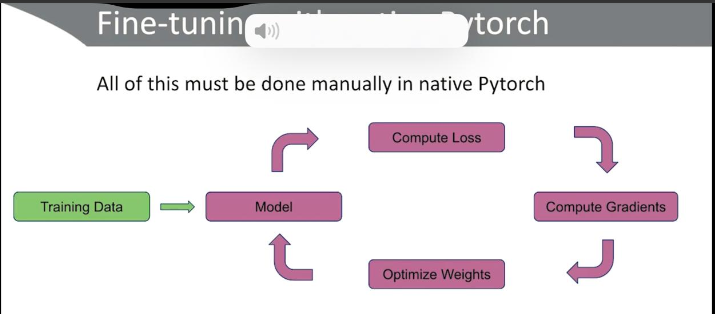

The image you uploaded illustrates the steps of the manual training process in native PyTorch, showing a sequence for model optimization. The diagram represents the following steps:

- Training Data (Input): The process starts with feeding the model training data.
- Model (Forward Pass): The model processes the data to make predictions.
Compute Loss: After the predictions, the loss function is computed, which measures how far the predictions are from the actual labels.
- Compute Gradients: The backward pass is performed, where gradients of the loss with respect to the model parameters are computed using backpropagation.
- Optimize Weights: The model's parameters are updated using an optimizer, such as stochastic gradient descent (SGD), which applies the gradients to adjust the weights.
The cycle repeats as the model iteratively trains and updates its parameters.

This diagram shows that in native PyTorch, you need to manually implement each of these steps (like forward pass, loss computation, backward pass, and optimization) during training.

## Fine - tuning with HuggingFace's Trainer

# Create Dataset and DataCollator
# Instatiate pre-trained model + tokenizer
training_args = TrainingArguments()
-trainer = Trainer(
   - model=pre_trained_model,
   - args=training_args,
# Create Dataset and DataCollator
# Instatiate pre-trained model + tokenizer
- training_args = TrainingArguments()
- trainer = Trainer(
    -model=pre_trained_model,
    -args=training_args,
    -train_dataset=train_dataset,
)
-trainer.train()

# Natural Language Understanding with BERT
- Introduction to BERT
- Wordpiece tokenization
- The many embedding of BERT


# Introduction to Bert
1.Bi-directional
2. Encoder
3.Representation from
4. Transformers
** auto encoding Language Model
-Encoder
Representatation from Transformers
** Relying on self attention
*Transformers
**The encoder is taken from the Transformer architecture


*   'I love my pet python

We feed this sentence into BERT to get a context-ful representation (vector embedding) of every word in the sentences

The enoder understands the context of each word in the sentence using a multi-head attention mechanism (which relates each word to every other word in the sentences) encoder stack



#Encoders need only apply:BERT'S architecture

In [21]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
# Lets load a vanilla BERT-base model
model = BertModel.from_pretrained('bert-base-uncased')

In [23]:
# Get all of the model's parameters as a list of tuples.
named_params = list(model.named_parameters())

print('The BERT model has (:) different named parameters.\n'.format(len(named_params)))

print('==== Embedding Layer ====\n')
# Changed from 0.5 to 0:5 to access the first 5 elements of the list as a slice
for p  in named_params[0:5]:
     print("(<55)  {:>12}".format(p[0], str(tuple(p[1].size())))) # Changed p[i] to p[1] to access the second element (tensor size)

print('\n==== First Encoder ====\n')
for p in named_params[5:21]:
    print("(<55)  {:>12}".format(p[0], str(tuple(p[1].size())))) # Changed p[i] to p[1] to access the second element (tensor size)
print('\n==== First Encoder ====\n')
for p in named_params[-2:]:
    print("(<55)  {:>12}".format(p[0], str(tuple(p[1].size())))) # Changed p[i] to p[1] to access the second element (tensor size)

The BERT model has (:) different named parameters.

==== Embedding Layer ====

(<55)  embeddings.word_embeddings.weight
(<55)  embeddings.position_embeddings.weight
(<55)  embeddings.token_type_embeddings.weight
(<55)  embeddings.LayerNorm.weight
(<55)  embeddings.LayerNorm.bias

==== First Encoder ====

(<55)  encoder.layer.0.attention.self.query.weight
(<55)  encoder.layer.0.attention.self.query.bias
(<55)  encoder.layer.0.attention.self.key.weight
(<55)  encoder.layer.0.attention.self.key.bias
(<55)  encoder.layer.0.attention.self.value.weight
(<55)  encoder.layer.0.attention.self.value.bias
(<55)  encoder.layer.0.attention.output.dense.weight
(<55)  encoder.layer.0.attention.output.dense.bias
(<55)  encoder.layer.0.attention.output.LayerNorm.weight
(<55)  encoder.layer.0.attention.output.LayerNorm.bias
(<55)  encoder.layer.0.intermediate.dense.weight
(<55)  encoder.layer.0.intermediate.dense.bias
(<55)  encoder.layer.0.output.dense.weight
(<55)  encoder.layer.0.output.dense.bias
(<

### The pooler is a seperate linear and tanh activated layer that acts on the [CLS] token's representation
### This pooled_output is often used as a representation for the entire sentence.

In [24]:
# Load the bert-base uncased tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [25]:
tokenizer.encode('Sinan loves a beautiful day') # tokenizer a simple sequence])

[101, 8254, 2319, 7459, 1037, 3376, 2154, 102]

In [26]:
# run tokens through the model

# 1 Turn tokens_with_unknown_words into a tensor (will be size 0,1)
# 2 Unsqueeze a first dimension to simulate batches. Resulting shape is (1, 8)
response = model(torch.tensor(tokenizer.encode('snan loves a beatiful day')).unsqueeze(0)) # Changed 'unsequeeze' to 'unsqueeze'

In [27]:
# Embedding for each token the first one being the (CLS) token
response.last_hidden_state

tensor([[[-0.1250,  0.0449, -0.0724,  ..., -0.2213,  0.2770,  0.0707],
         [ 0.8118, -0.4798,  0.1358,  ...,  0.0367,  0.2662, -0.3859],
         [ 0.0747, -1.2069, -0.6745,  ..., -0.4043,  0.1036,  0.0742],
         ...,
         [-0.4921,  0.2156,  0.2636,  ...,  0.0827,  0.2709, -0.0733],
         [-0.2185, -0.2852, -0.1310,  ...,  0.3818,  0.5475, -0.4216],
         [ 0.5793,  0.0479, -0.1237,  ..., -0.0578, -0.3719, -0.3741]]],
       grad_fn=<NativeLayerNormBackward0>)

In [28]:
response.pooler_output.shape

torch.Size([1, 768])

In [29]:
model.pooler

BertPooler(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (activation): Tanh()
)

In [30]:
# grab the final encoder's representation of the CLS token
CLS_embedding = response.last_hidden_state[:,0,:].unsqueeze(0)
CLS_embedding.shape

torch.Size([1, 1, 768])

In [31]:
# grab the final encoder's representation of the CLS token
# The original code had an extra unsqueeze(0) which added an unnecessary dimension.
# Remove that and ensure the shape is [batch_size, sequence_length, hidden_size]
CLS_embedding = response.last_hidden_state[:,0,:] # Shape should be [batch_size, hidden_size]

# Reshape to have the batch size dimension if necessary
CLS_embedding = CLS_embedding.unsqueeze(0) # Shape should be [1, hidden_size] if batch_size is 1

# Now the shape should be compatible with the BertPooler
print(CLS_embedding.shape)  # Verify the shape before passing to the pooler
output = model.pooler(CLS_embedding)
print(output.shape)

torch.Size([1, 1, 768])
torch.Size([1, 768])


In [32]:
model.pooler(CLS_embedding).shape

torch.Size([1, 768])

In [33]:
# Running the embedding for CLS through the pooler gives the same output as the "poolar_output"
(model.pooler(CLS_embedding) == response.pooler_output).all

<function Tensor.all>

In [34]:
total_params = 0
for p in model.parameters():
  if len(p.shape) ==2:
    total_params += p.shape[0]* p.shape[1]

print(f' Total Parameters:{total_params:,}') # this is wharer the 110m parameter comes from

 Total Parameters:109,360,128


In [35]:
30522*768

23440896

##Workpiece Tokenization


                ***** "Another beautiful day"****
To tokenize this we split into a list of tokens in our vocabulary over 30,000 tokens. We also add two special tokens[CLS] at the beginning of the phrase and [SEP] at the end. [CLS] is meant to represent the entire sequences and [SEP] is meant to represent seperation  between sentences

Wordpiece tokenization
Bert Tokenizer
Let use the from_pretrained method to grab the uncased bert-base tokenizer

### NLU_with_BERT

In [36]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

print(f'Length of BERT base vocabulary: {len(tokenizer.vocab)}')

Length of BERT base vocabulary: 30522


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [38]:
text = "A simple sentences!"

tokens = tokenizer.encode(text) # get token ids per BERT- base's vocabulary
print(tokens)

[101, 1037, 3722, 11746, 999, 102]


In [39]:
tokenizer.decode(tokens)

'[CLS] a simple sentences! [SEP]'

In [40]:
text = "my friend told me about this class and iI love it so far! she was right."

tokens = tokenizer.encode(text)
print(tokens)

[101, 2026, 2767, 2409, 2033, 2055, 2023, 2465, 1998, 2462, 2293, 2009, 2061, 2521, 999, 2016, 2001, 2157, 1012, 102]


In [41]:
# nicer  printout of token ids and token strings

print(f'Text:(text). num tokens: {len(tokens)}')
for t in tokens:
  print(f'Token: {t}, subword: {tokenizer.decode([t])}')

Text:(text). num tokens: 20
Token: 101, subword: [CLS]
Token: 2026, subword: my
Token: 2767, subword: friend
Token: 2409, subword: told
Token: 2033, subword: me
Token: 2055, subword: about
Token: 2023, subword: this
Token: 2465, subword: class
Token: 1998, subword: and
Token: 2462, subword: ii
Token: 2293, subword: love
Token: 2009, subword: it
Token: 2061, subword: so
Token: 2521, subword: far
Token: 999, subword: !
Token: 2016, subword: she
Token: 2001, subword: was
Token: 2157, subword: right
Token: 1012, subword: .
Token: 102, subword: [SEP]


In [42]:
# sinan is not in our vocab :
'sinan' is tokenizer.vocab

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-42-3eb4bd5b631b>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  'sinan' is tokenizer.vocab


False

In [43]:
tokenizer.encode('sinan')

[101, 8254, 2319, 102]

In [44]:
tokenizer.encode('an')

[101, 2019, 102]

In [45]:
text_with_unknown_words = 'sinan is our instructor for this awesomesauces class'
tokens_with_unknown_words = tokenizer.encode(text_with_unknown_words)


for t in tokens_with_unknown_words:
  print(f'Token: {t}, subword: {tokenizer.decode({t})}')

Token: 101, subword: [CLS]
Token: 8254, subword: sin
Token: 2319, subword: ##an
Token: 2003, subword: is
Token: 2256, subword: our
Token: 9450, subword: instructor
Token: 2005, subword: for
Token: 2023, subword: this
Token: 12476, subword: awesome
Token: 23823, subword: ##sau
Token: 9623, subword: ##ces
Token: 2465, subword: class
Token: 102, subword: [SEP]


In [46]:
text = 'my friend told me about this class and I love love it so far! she was right.'

# encode_plus gives us token ids, attention mask and sgment ids (A vs B). Useful for training time.

tokens = tokenizer.encode_plus(text)
print(tokens)

{'input_ids': [101, 2026, 2767, 2409, 2033, 2055, 2023, 2465, 1998, 1045, 2293, 2293, 2009, 2061, 2521, 999, 2016, 2001, 2157, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [47]:
tokenizer(text) # calling the tokenizer directly does the same thing as encode_plus

{'input_ids': [101, 2026, 2767, 2409, 2033, 2055, 2023, 2465, 1998, 1045, 2293, 2293, 2009, 2061, 2521, 999, 2016, 2001, 2157, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [48]:

# python is the 6th token (don't forget the [CLS] token!)
python_pet = tokenizer.encode('I love my pet python')

# python is the 6th token (don't forget the [CLS] token!)
python_language = tokenizer.encode('I love coding in python')

In [49]:
# contentext_embedding of 'python' in 'I love my pet python'
output = model(torch.tensor(python_pet).unsqueeze(0))  # Get the model output
python_pet_embedding = output.last_hidden_state[:, 5, :].detach().numpy()  # Access the last hidden state

# contextful embedding of 'python' in  'I love coding in python
output = model(torch.tensor(python_language).unsqueeze(0))  # Get the model output
python_language_embedding = output.last_hidden_state[:, 5, :].detach().numpy()  # Access the last hidden state

# Contextful embeding of 'snake' in 'snake'
output = model(torch.tensor(tokenizer.encode('snake')).unsqueeze(0))  # Get the model output
snake_alone_embedding = output.last_hidden_state[:, 0, :].detach().numpy()  # Access the last hidden state

# Contextful embedding of 'programming' in 'programming'
output = model(torch.tensor(tokenizer.encode('programming')).unsqueeze(0))  # Get the model output
programming_alone_embedding = output.last_hidden_state[:, 0, :].detach().numpy()  # Access the last hidden state

In [50]:
python_pet_embedding.shape

(1, 768)

In [51]:
python_language_embedding.shape

(1, 768)

In [52]:
# similarity of the representation of the word python is a sentences about coding to the word snake
cosine_similarity(python_language_embedding, snake_alone_embedding)

array([[0.12268838]], dtype=float32)

In [53]:
# similarity of the representation of the word python is a sentences about pets to the word snakeMore similar
cosine_similarity(python_pet_embedding, snake_alone_embedding)

array([[0.13277525]], dtype=float32)

In [54]:
# similarity of the representation of the word python is a sentences about pet to the word programming
cosine_similarity(python_pet_embedding, programming_alone_embedding)

array([[0.14627169]], dtype=float32)

In [55]:
# similarity of the representation of the word python is a sentences about coding to the word programming more similar
cosine_similarity(python_language_embedding, programming_alone_embedding)

array([[0.19101894]], dtype=float32)

##The many embeddings of BERT'S
ings
Final Input Representation: The final input representation for each token in BERT is obtained by summing the three types of embeddings:
Input Embedding

##Token Embedding
Purpose: Token embeddings convert input tokens (words or subwords) into dense vector representations. Each token in the vocabulary has a corresponding embedding vector.
WordPiece Tokenization:
BERT uses a subword tokenization method called WordPiece. This approach allows it to handle out-of-vocabulary words by breaking them down into smaller, manageable subwords or character pieces.
For example, the word "playing" might be tokenized into "play" and "##ing". The "##" indicates that "ing" is a suffix attached to the preceding token.
##Segment Embedding
Purpose: Segment embeddings are used to distinguish between different segments of text in tasks that involve pairs of sentences, such as question-answering or sentence similarity.
Implementation:
In BERT, two segments are represented: Segment A (for the first sentence) and Segment B (for the second sentence).
The segment embeddings are added to the token embeddings to provide context about which segment each token belongs to.
Typically, Segment A is represented by a vector of all zeros, and Segment B is represented by a vector of ones.
##Positional Embedding
Purpose: Positional embeddings provide information about the position of each token in the input sequence since the Transformer architecture does not inherently capture the order of tokens.
Implementation:
BERT adds sinusoidal positional encodings to the token embeddings. These encodings are derived from sine and cosine functions of different frequencies and are designed to allow the model to easily learn the relative positions of tokens.
The formula for the positional encoding
𝑃
𝐸
(
𝑝
𝑜
𝑠
,
2
𝑖
)
PE(pos,2i) and
𝑃
𝐸
(
𝑝
𝑜
𝑠
,
2
𝑖
+
1
)
PE(pos,2i+1) is given by:
𝑃
𝐸
(
𝑝
𝑜
𝑠
,
2
𝑖
)
=
sin
⁡
(
𝑝
𝑜
𝑠
1000
0
2
𝑖
𝑑
)
PE(pos,2i)=sin(
10000
d
2i
​


pos
​
 )
𝑃
𝐸
(
𝑝
𝑜
𝑠
,
2
𝑖
+
1
)
=
cos
⁡
(
𝑝
𝑜
𝑠
1000
0
2
𝑖
𝑑
)
PE(pos,2i+1)=cos(
10000
d
2i
​


pos
​
 )
Here,
𝑝
𝑜
𝑠
pos is the position,
𝑖
i is the dimension index, and
𝑑
d is the total dimensionality of the embeddings.
5. Embedding Dimension
Embedding Size: BERT typically uses an embedding size of 768 for the base model and 1024 for the large model. Each of the embeddings (token, segment, and positional) has the same dimensionality, ensuring they can be summed directly.
Summary
BERT’s embedding layers play a crucial role in how the model understands and processes text. By leveraging token, segment, and positional embeddings, BERT effectively captures the meanings and relationships of words in context, enabling it to excel in various natural language understanding tasks.

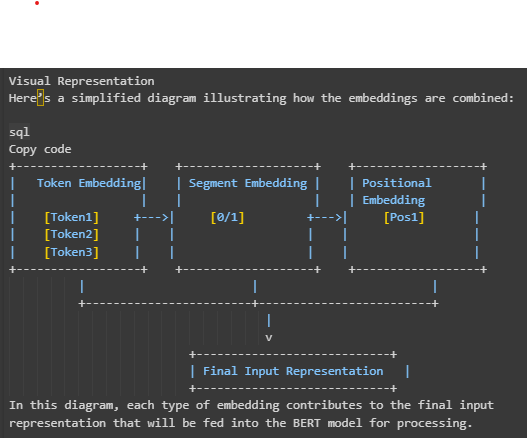

In [56]:
from transformers import BertModel, BertTokenizer

In [57]:
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [58]:
"""
word_embedding == context-free word embeddings
position_embedding == encodes word positional_encoding
token_type_embedding == 0 or 1. Used to lookup the segment torch.embedding
"""

model.embeddings

BertEmbeddings(
  (word_embeddings): Embedding(30522, 768, padding_idx=0)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(2, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [59]:
example_phrase = 'I am sinan'

# return_tensors= 'pt' converts to pytorch automatically
tokenizer.encode(example_phrase, return_tensors='pt')

tensor([[ 101, 1045, 2572, 8254, 2319,  102]])

In [60]:
# context-less embedding of each token in our sentences
model.embeddings.word_embeddings(tokenizer.encode(example_phrase, return_tensors='pt'))

tensor([[[ 0.0136, -0.0265, -0.0235,  ...,  0.0087,  0.0071,  0.0151],
         [-0.0211,  0.0059, -0.0179,  ...,  0.0163,  0.0122,  0.0073],
         [-0.0437, -0.0150,  0.0029,  ..., -0.0282,  0.0474, -0.0448],
         [-0.0022, -0.0876,  0.0143,  ...,  0.0232, -0.0024, -0.0213],
         [-0.0614, -0.0044, -0.0755,  ..., -0.0522, -0.0310, -0.0248],
         [-0.0145, -0.0100,  0.0060,  ..., -0.0250,  0.0046, -0.0015]]],
       grad_fn=<EmbeddingBackward0>)

In [61]:
# Note the first and last row are the same because they are the
# [CLS] and [SEP] reserved  tokens. They are the same  without context for every input
model.embeddings.word_embeddings(tokenizer.encode('I am Matt', return_tensors='pt'))

tensor([[[ 0.0136, -0.0265, -0.0235,  ...,  0.0087,  0.0071,  0.0151],
         [-0.0211,  0.0059, -0.0179,  ...,  0.0163,  0.0122,  0.0073],
         [-0.0437, -0.0150,  0.0029,  ..., -0.0282,  0.0474, -0.0448],
         [-0.0381, -0.0026,  0.0130,  ...,  0.0038, -0.0279, -0.0082],
         [-0.0145, -0.0100,  0.0060,  ..., -0.0250,  0.0046, -0.0015]]],
       grad_fn=<EmbeddingBackward0>)

In [62]:
model.embeddings.position_embeddings # 512 embeddings, one for each position in a max 512 input sequencetorch.LongTensor

Embedding(512, 768)

In [63]:
torch.LongTensor(range(6))

tensor([0, 1, 2, 3, 4, 5])

In [64]:
model.embeddings.position_embeddings(torch.LongTensor(range(6)))

tensor([[ 1.7505e-02, -2.5631e-02, -3.6642e-02,  ...,  3.3437e-05,
          6.8312e-04,  1.5441e-02],
        [ 7.7580e-03,  2.2613e-03, -1.9444e-02,  ...,  2.8910e-02,
          2.9753e-02, -5.3247e-03],
        [-1.1287e-02, -1.9644e-03, -1.1573e-02,  ...,  1.4908e-02,
          1.8741e-02, -7.3140e-03],
        [-4.1949e-03, -1.1852e-02, -2.1180e-02,  ...,  2.2455e-02,
          5.2826e-03, -1.9723e-03],
        [-5.6087e-03, -1.0445e-02, -7.2288e-03,  ...,  2.0837e-02,
          3.5402e-03,  4.7708e-03],
        [-3.0871e-03, -1.8956e-02, -1.8930e-02,  ...,  7.4045e-03,
          2.0183e-02,  3.4077e-03]], grad_fn=<EmbeddingBackward0>)

In [65]:
model.embeddings.token_type_embeddings # 2 embeddings, one for each segment

Embedding(2, 768)

In [66]:
model.embeddings.token_type_embeddings(torch.LongTensor((0)*6)) # All tokens have the same embedding

tensor([], size=(0, 768), grad_fn=<EmbeddingBackward0>)

In [67]:
torch.LongTensor((0)*6)

tensor([], dtype=torch.int64)

In [68]:
# Apply feed forward normalisation layer
model.embeddings.LayerNorm(
    model.embeddings.word_embeddings(tokenizer.encode(example_phrase, return_tensors ='pt')) + \
    model.embeddings.position_embeddings(torch.LongTensor(range(6))) + \
    model.embeddings.token_type_embeddings(torch.LongTensor([0]*6))
)


tensor([[[ 1.6855e-01, -2.8577e-01, -3.2613e-01,  ..., -2.7571e-02,
           3.8253e-02,  1.6400e-01],
         [-3.4024e-04,  5.3974e-01, -2.8805e-01,  ...,  7.5731e-01,
           8.9008e-01,  1.6575e-01],
         [-6.3496e-01,  1.9748e-01,  2.5116e-01,  ..., -4.0819e-02,
           1.3468e+00, -6.9357e-01],
         [ 2.8197e-01, -1.0037e+00,  3.5063e-01,  ...,  8.5378e-01,
           3.9389e-01, -8.4527e-02],
         [-7.3509e-01,  3.3429e-01, -8.3037e-01,  ..., -2.1545e-01,
          -6.6517e-02, -2.6881e-02],
         [-3.2507e-01, -3.1879e-01, -1.1632e-01,  ..., -3.9602e-01,
           4.1120e-01, -7.7552e-02]]], grad_fn=<NativeLayerNormBackward0>)

In [69]:
# Et Voila! The many embeddings of BERT become one embedding per token
model.embeddings(tokenizer.encode(example_phrase, return_tensors='pt'))

tensor([[[ 1.6855e-01, -2.8577e-01, -3.2613e-01,  ..., -2.7571e-02,
           3.8253e-02,  1.6400e-01],
         [-3.4026e-04,  5.3974e-01, -2.8805e-01,  ...,  7.5731e-01,
           8.9008e-01,  1.6575e-01],
         [-6.3496e-01,  1.9748e-01,  2.5116e-01,  ..., -4.0819e-02,
           1.3468e+00, -6.9357e-01],
         [ 2.8197e-01, -1.0037e+00,  3.5063e-01,  ...,  8.5378e-01,
           3.9389e-01, -8.4527e-02],
         [-7.3509e-01,  3.3429e-01, -8.3037e-01,  ..., -2.1545e-01,
          -6.6517e-02, -2.6881e-02],
         [-3.2507e-01, -3.1879e-01, -1.1632e-01,  ..., -3.9602e-01,
           4.1120e-01, -7.7552e-02]]], grad_fn=<NativeLayerNormBackward0>)

In [70]:
model.embeddings(tokenizer.encode(example_phrase, return_tensors='pt')).shape

torch.Size([1, 6, 768])

## The many embeddings of BERTPre-Training and Fine-Tuning BERT

## The Maked Language Modeling Task
#Pre-trained BERT -  MLM

In [71]:
from transformers import BertForMaskedLM, pipeline

In [74]:
# Transformers package comes with several standard "heads" on top of the standard BEERT model
bert_1m = BertForMaskedLM.from_pretrained('bert-base-cased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [75]:
bert_1m

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [79]:
# Pipelines in transformers take in models/tokenizers and are easy way to perform several tasks

# We can perform an auto-encoder language model task
nlp = pipeline("fill-mask", model='bert-base-cased')

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [80]:
type(nlp.model)

transformers.models.bert.modeling_bert.BertForMaskedLM

In [81]:
nlp.tokenizer

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [82]:
print(type(nlp.tokenizer))

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [83]:
preds = nlp(f"If you don't {nlp.tokenizer.mask_token} at the sign, you will get a ticket.")

In [92]:
print(f"If you don't *** at the sign, you will get a ticket.")
for p in preds:
    print(f"Token: {p['token_str']}, Score: {100*p['score']:,.2f}%")

If you don't *** at the sign, you will get a ticket.
Token: stop, Score: 51.10%
Token: look, Score: 38.41%
Token: arrive, Score: 1.11%
Token: glance, Score: 1.05%
Token: turn, Score: 0.72%


#The next sentences prediction task
Masked Language Modelling and Next Sentences Prediction

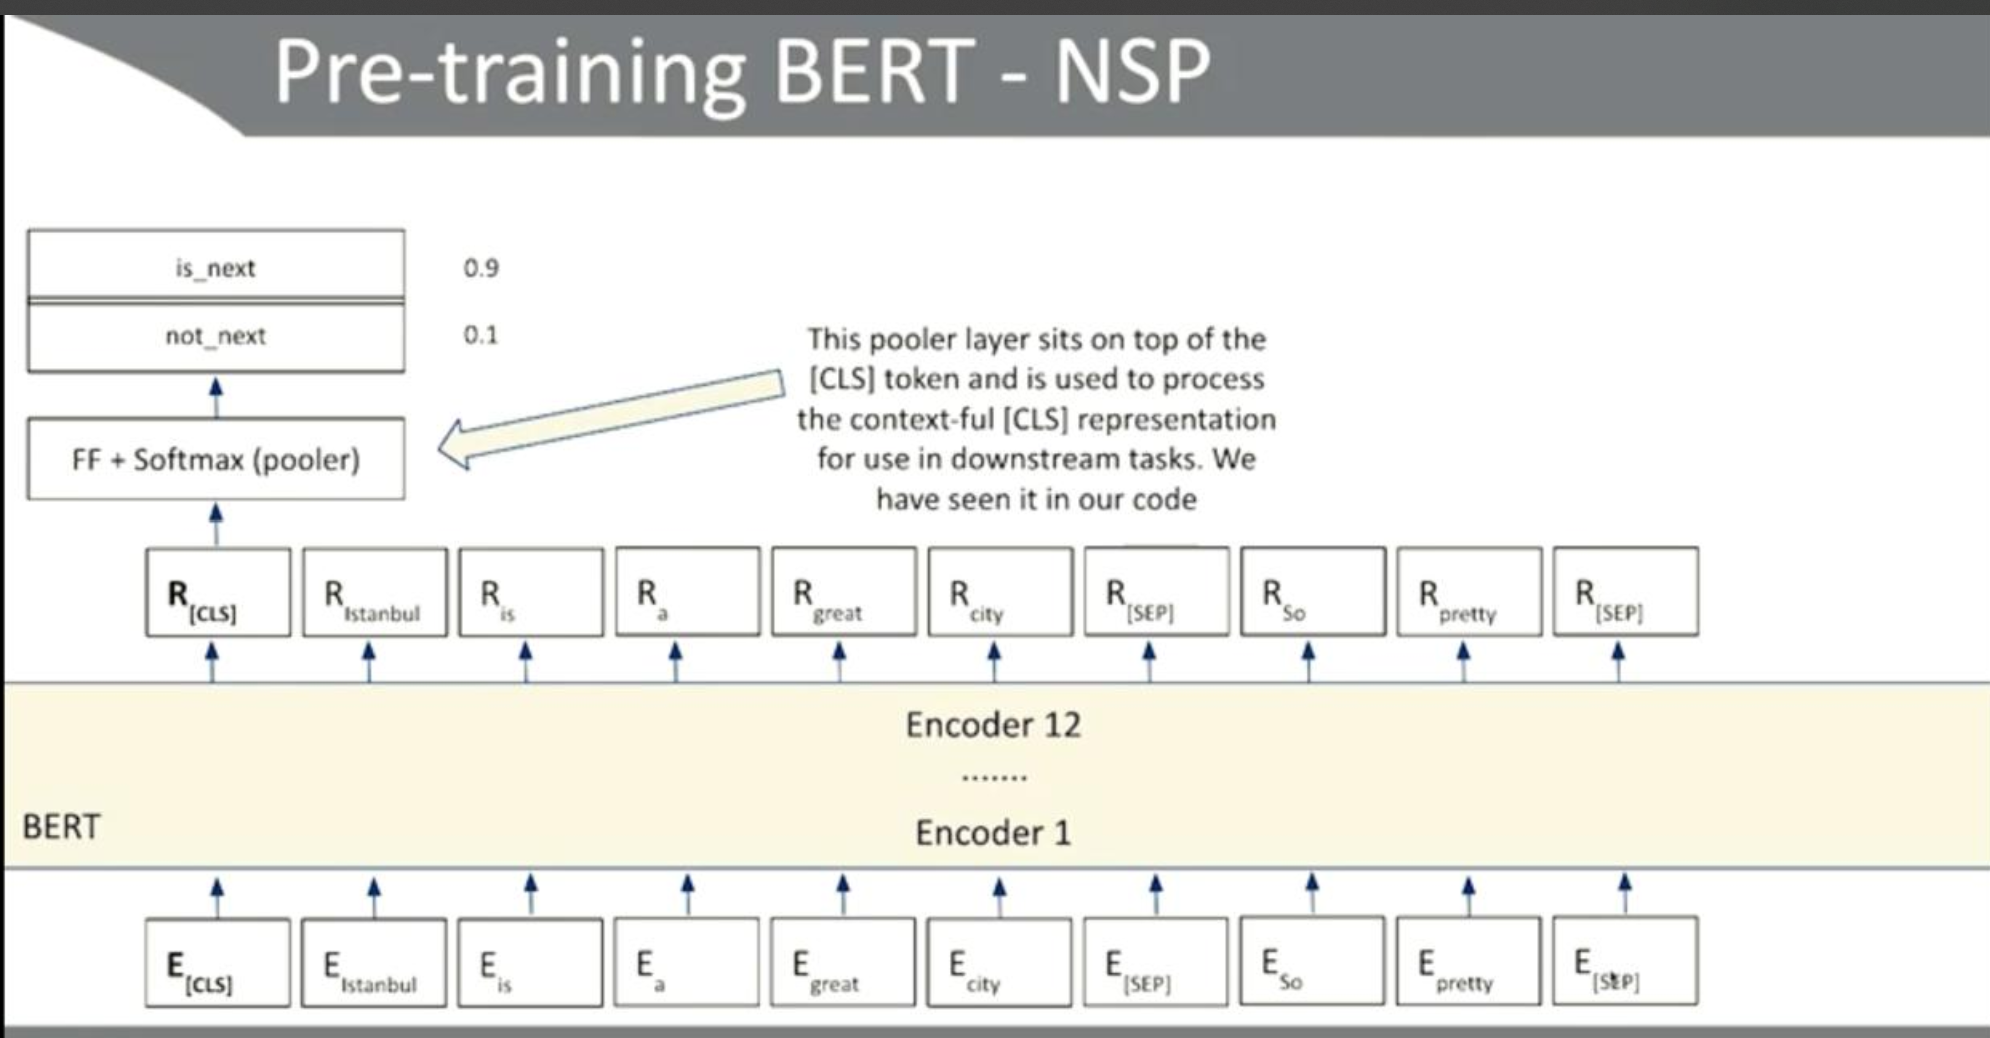

In [94]:
from transformers import BertForNextSentencePrediction, BertTokenizer
import torch

In [95]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_nsp= BertForNextSentencePrediction.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [96]:
bert_nsp

BertForNextSentencePrediction(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [99]:
text = "Deliver huge improvements to your machine learning piplines without spending hours fine-tuning parameters!"
text2 =  "This book's practical case-studies reveal feature engineering techniques that upgrade your data wrangling-and-modeling workflow."

In [100]:
inputs = tokenizer(text, text2, return_tensors='pt')

In [101]:
inputs

{'input_ids': tensor([[  101,  8116,  4121,  8377,  2000,  2115,  3698,  4083, 28315, 12735,
          2302,  5938,  2847,  2986,  1011, 17372, 11709,   999,   102,  2023,
          2338,  1005,  1055,  6742,  2553,  1011,  2913,  7487,  3444,  3330,
          5461,  2008, 12200,  2115,  2951, 23277,  5654,  2989,  1011,  1998,
          1011, 11643,  2147, 12314,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [102]:
inputs.input_ids # segment Ids (0 ==A & 1 ===B)

tensor([[  101,  8116,  4121,  8377,  2000,  2115,  3698,  4083, 28315, 12735,
          2302,  5938,  2847,  2986,  1011, 17372, 11709,   999,   102,  2023,
          2338,  1005,  1055,  6742,  2553,  1011,  2913,  7487,  3444,  3330,
          5461,  2008, 12200,  2115,  2951, 23277,  5654,  2989,  1011,  1998,
          1011, 11643,  2147, 12314,  1012,   102]])

In [103]:
inputs.attention_mask # pay attention to everything

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [104]:
# 0 == "isNextSentences" and 1 =="notNextSentences"
outputs = bert_nsp(**inputs)
outputs

NextSentencePredictorOutput(loss=None, logits=tensor([[ 6.0752, -5.6169]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [105]:
# calculate loss by passing through  a label
outputs = bert_nsp(**inputs, labels=torch.LongTensor([0]))
outputs

NextSentencePredictorOutput(loss=tensor(8.3446e-06, grad_fn=<NllLossBackward0>), logits=tensor([[ 6.0752, -5.6169]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

#Fine - tunning BERT to solve NLP task